# Thyroid Nodule Insights: A RAG System Using Llama2 via Hugging Face

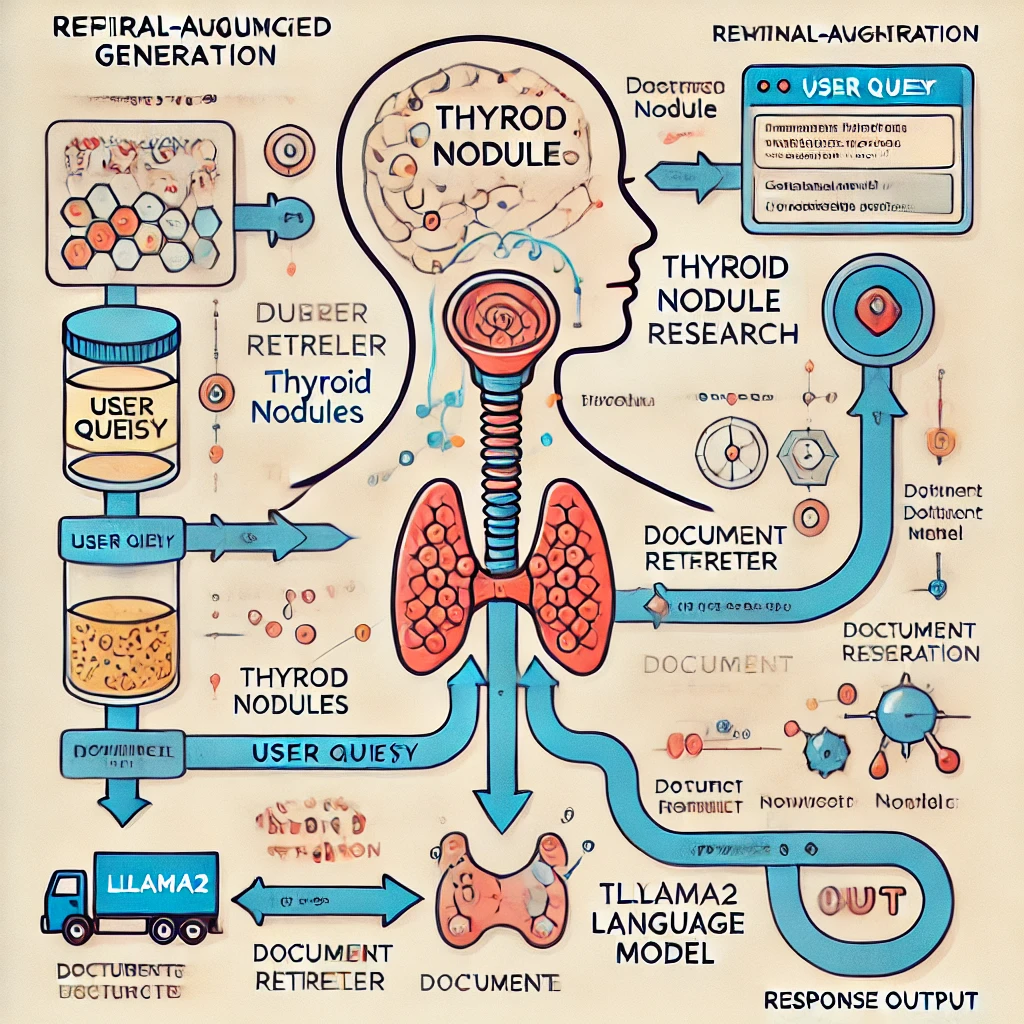

## What is a Retrieval-Augmented Generation (RAG) System Using Llama2?

A **Retrieval-Augmented Generation (RAG)** system combines two powerful techniques in natural language processing: information retrieval and text generation. In a RAG system, the process involves:

1) Retrieving relevant documents or information: The system searches a set of documents or a knowledge base to find information that is relevant to the user’s query.

2) Generating a response : Using a language model like Llama2, the system generates a human-like response, augmented with the retrieved information.
* 
**How it Works with Llama2:**
* Llama2 is a large language model that excels in text generation tasks. When integrated into a RAG system, Llama2 doesn’t just generate responses based on its pre-trained knowledge, but enhances its outputs by retrieving external, relevant documents in real-time.
  
* In this case, for thyroid nodule research, the RAG system retrieves documents or scientific literature on thyroid nodules and then uses Llama2 to generate precise, context-aware responses based on that information.
  
**Key Components:**
* Document Retriever: This module finds relevant documents (e.g., research papers or medical records).
* Llama2 Model: This module processes the query and retrieved information to generate an accurate, human-like answer.
Thyroid Nodule Knowledge Base: A collection of documents related to thyroid nodules used to provide up-to-date and accurate information in the generation process.

**Why Use a RAG System?**

A RAG system offers a combination of information accuracy and natural language generation, making it useful for domains like medical research. It can:

* Provide users with well-informed answers.
* Ensure responses are grounded in real data.
* Improve response quality by augmenting the model’s knowledge with up-to-date information.

This notebook demonstrates how to build a RAG system using Llama2 to assist with thyroid nodule research.


# Installing Libraries

In this section, we will install necessary libraries. 
These libraries are pypdf, transformers, einops, accelerate, langchain, bitsandbytes, sentence_transformers, and llama_index

In [1]:
!pip install pypdf -q

Key Features of **PyPDF**:

* Extract Text: You can extract text content from PDF documents.
* Split and Merge PDFs: It allows you to split a PDF into individual pages or merge multiple PDFs into one.
* Rotate and Crop Pages: You can rotate pages, crop them, or extract specific pages.
* Add Metadata: You can add or modify metadata like author, title, and keywords.
* Encrypt and Decrypt PDFs: It can encrypt PDF documents with a password or decrypt password-protected files.

In [2]:
!pip install -q transformers einops accelerate langchain bitsandbytes -q

* Transformers: Provides access to pre-trained transformer models for NLP tasks.
* Einops: Makes tensor manipulations easier and more readable.
* Accelerate: Simplifies training on multiple hardware setups (GPUs, TPUs).
* LangChain: Helps build complex LLM-powered applications by chaining together various tasks.
* BitsAndBytes: Allows model quantization for faster inference and reduced memory usage.


In [3]:
!pip install sentence_transformers -q

* Sentence-Transformers  allows you to easily use and fine-tune transformer models for tasks like semantic search, text similarity, clustering, and information retrieval. It extends popular transformer models, such as BERT, RoBERTa, and others, by optimizing them specifically for generating meaningful vector representations of entire sentences and paragraphs, not just individual tokens or words.

In [4]:
!pip install llama-index -q

**llama_index** is a powerful library for building document indices that can be queried using natural language, facilitating efficient information retrieval from large datasets. Its features such as document indexing, support for multiple data sources, and integration with LLMs make it a valuable tool for developers working in the field of NLP and data management.

In [5]:
%pip install llama-index-llms-huggingface -q

Note: you may need to restart the kernel to use updated packages.


* Hugging Face LLM Integration: Leverages Hugging Face models to process and retrieve data efficiently.
* Data Indexing: Enables advanced data indexing and retrieval methods using LLMs.
* Versatile Applications: Suitable for natural language processing (NLP) tasks such as question answering, summarization, and semantic search.

In [6]:
!pip install sentence-transformers -q

* Text Embeddings: Transforms sentences into high-quality dense embeddings for similarity comparison.
* Pretrained Models: Offers a variety of ready-to-use models for various NLP tasks.
* Applications: Useful for tasks such as sentence similarity, semantic search, clustering, and question-answer retrieval.

In [7]:
!pip install llama-index-embeddings-langchain -q

* LlamaIndex Integration: Combines LlamaIndex capabilities with LangChain for enhanced data retrieval.
* Embeddings Support: Allows embeddings for semantic search and contextual information retrieval tasks.
* NLP Applications: Useful for question answering, document indexing, and conversational agents.

# Importing Libraries

In [12]:
# Import classes for creating vector indices and reading documents
from llama_index.core import VectorStoreIndex,SimpleDirectoryReader,ServiceContext,PromptTemplate
#Import Hugging Face LLM for text generation and embeddings
from llama_index.llms.huggingface import HuggingFaceLLM
# Import class for creating simple input prompts for LLM queries
from llama_index.core.prompts.prompts import SimpleInputPrompt
# Import PyTorch for tensor operations and deep learning
import torch
# Import ServiceContext for managing configurations and services in llama_index
from llama_index.core import ServiceContext
# Import embeddings class from LangChain for using Hugging Face models
from langchain_community.embeddings import HuggingFaceEmbeddings
# Import LangchainEmbedding for generating embeddings with LangChain models
from llama_index.embeddings.langchain import LangchainEmbedding
#loging huggingface
from huggingface_hub import login
# Import necessary modules from Hugging Face:
# AutoModelForCausalLM: For loading the causal language model (e.g., LLaMA).
# AutoTokenizer: For loading the tokenizer associated with the model.
# BitsAndBytesConfig: For configuring model quantization (e.g., 8-bit or 4-bit) to reduce memory usage.
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig


from llama_index.core import Settings
from llama_index.embeddings.langchain import LangchainEmbedding
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Login HuggingFace

Before starting the project, you must create a Hugging Face user token to access the Llama and embedding models. This token is unique to your account, so do not share it with anyone. Once you've generated your token, enter it in the "Token ID" field and remove the # from the code below.

In [35]:
#login(token="TOKEN ID")

In [ ]:
!huggingface-cli login

# Reading Documents

The code reads and loads all the documents stored in the folder **"Thyroid Nodules Documents"** into memory. These documents will be used by the RAG (Retrieval-Augmented Generation) system to retrieve relevant information during queries.


In [11]:
documents=SimpleDirectoryReader("Thyroid Nodules Documents").load_data()
#documents

# Creating Prompt and Query

This section is crucial for defining the assistant's role — to provide accurate answers based on the given instructions and context.

In [15]:
# System prompt for overall guidance
system_prompt="""
You are a Q&A assistant. Your goal is to answer questions accurately based on the instructions and context provided.
"""
# Query wrapper prompt to guide the format of responses
query_wrapper_prompt=SimpleInputPrompt("<|USER|>{query_str}<|ASSISTANT|>")

# Integrating Llama2 with Hugging Face 🦙

In this section, we will initialize a **Llama-2-7b-chat** model along with its tokenizer. The model is loaded with 16-bit precision and configured for quantization, which helps reduce memory usage. After loading, the model and tokenizer are passed to `HuggingFaceLLM`. We also define specific parameters like the context window, maximum token length, and prompts to control how the model generates responses. This setup optimizes performance while ensuring accurate output generation.

In [16]:

# Load the tokenizer and the model with the quantization config
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Llama-2-7b-chat-hf",
    device_map="auto",
    torch_dtype=torch.float16,  # Reduced precision
    # Use quantization config for 8-bit
)

# Now pass the model and tokenizer to HuggingFaceLLM
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    model=model,  # Pass the quantized model here
    tokenizer=tokenizer  # Pass the tokenizer
)


Loading checkpoint shards: 100%|██████████| 2/2 [00:22<00:00, 11.46s/it]
Some parameters are on the meta device because they were offloaded to the disk.


# Initialize Sentence Embedding Model
We will initialize a sentence embedding model using the **`all-mpnet-base-v2`** variant from the **Sentence Transformers** library.Also, The `HuggingFaceEmbeddings` class is used to create embeddings that can be utilized for various natural language processing tasks, such as semantic search or text similarity.

In [18]:
embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

# Configure Language Model and Embedding Settings
The initialized language model (`llm`) is assigned to `Settings.llm`. Additionally, the previously created embedding model (`embed_model`) is wrapped using `LangchainEmbedding` and assigned to `Settings.embed_model`. This setup effectively prepares both the language model and embedding model for subsequent processing and analysis.


In [19]:
Settings.llm=llm
Settings.embed_model = LangchainEmbedding(embed_model)

# Create a Vector Store Index from Documents
`VectorStoreIndex` uses a collection of documents and a specified service context (`Settings`). The `from_documents` method processes the provided documents to create an index that facilitates efficient retrieval and similarity search based on vector representations. 

In the context of Retrieval-Augmented Generation (RAG), this index serves as the retrieval mechanism that fetches relevant documents to inform the generative model. The combination of this retrieval step and a generative language model enables the system to produce contextually relevant responses based on the retrieved information.


In [20]:
index=VectorStoreIndex.from_documents(documents,service_context=Settings)

# Create a Query Engine from the Vector Store Index
Now, we will create a query engine from the `VectorStoreIndex` using the `as_query_engine()` method. The resulting query engine enables efficient querying of the index, allowing users to perform searches and retrieve relevant documents based on input queries.


In [21]:
query_engine=index.as_query_engine()

# Query the Index for Information on Thyroid Nodules
This is the final part of our code. You can ask any questions about thyroid nodules.

The code uses the `query_engine` to search the index with the question. The `query()` method processes the input and retrieves relevant documents or information related to thyroid nodules from the previously indexed data.

In [24]:
response=query_engine.query("What are the Thyroid Nodules?")

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


In [25]:
print(response)

Thyroid nodules are abnormal growths or lumps that develop in the thyroid gland. They can be benign (non-cancerous) or malignant (cancerous). The most common symptoms of thyroid nodules are hoarseness, difficulty swallowing, and shortness of breath. The risk of cancer is approximately 14% for a thyroid nodule that is interpreted as atypia of undetermined significance or follicular lesion of undetermined significance, and approximately 25% for a nodule that is interpreted as follicular neoplasm or possible follicular neoplasm. Laboratory tests, such as measuring thyroid hormone levels, can help determine if the nodule is producing excessive amounts of thyroid hormones. Physical examination and imaging tests, such as ultrasound or CT scans, can help determine the size, shape, and location of the nodule. If the nodule is suspicious, it may be recommended to undergo a thyroidectomy (surgical removal of the thyroid gland) to confirm the diagnosis.


In [30]:
response=query_engine.query("Are Goiter and Nodule the same thing?")

In [31]:
print(response)

Goiter and nodule are not the same thing. Goiter refers to an enlargement of the thyroid gland, which can be caused by various factors such as hypothyroidism, hyperthyroidism, or thyroid nodules. A nodule, on the other hand, is a small, abnormal growth or lump in the thyroid gland. A nodule can be a part of a goiter, but goiter and nodule are not interchangeable terms.


In [32]:
response=query_engine.query("What is the probability of Nodule?")

In [33]:
print(response)

The probability of a nodule in people is difficult to determine based solely on the provided context information. The article mentions that the risk of cancer in nodules varies depending on the size of the nodule, with larger nodules (4 cm or larger) having a higher risk of cancer. However, the article does not provide specific data on the probability of nodules in the general population.

Additionally, the article highlights the limitations of fine-needle aspiration (FNA) in diagnosing nodules, including the potential for false negative results. This suggests that the probability of a nodule being cancerous may be higher than what is suggested by the FNA results alone.

In summary, while the article provides some information on the risk of cancer in nodules, it does not provide a direct answer to the query on the probability of nodules in people. Further research or consultation with a medical professional may be necessary to determine the probability of nodules in the general populat

In [22]:
response=query_engine.query("What are the methods used to detect thyroid nodules?")

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


In [24]:
print(response)

Based on the provided context information, the methods used to detect thyroid nodules are:

1. Clinical evaluation: A thorough physical examination of the neck, throat, and lymph nodes is performed to detect any abnormalities.
2. Thyroid function tests: Measuring thyrotropin (TSH) levels can help identify hyperfunctioning nodules, while measuring free thyroxine (FT4) and total triiodothyronine (FT3) levels can help diagnose hypothyroidism or hyperthyroidism.
3. Ultrasonography: This non-invasive imaging technique is used to evaluate the size, composition, and location of thyroid nodules.
4. Fine-needle aspiration biopsy (FNAB): This diagnostic procedure involves inserting a fine needle into the nodule to collect cells for further examination.
5. Thyroid scintigraphy: This imaging technique uses radioactive iodine to evaluate the function of the thyroid gland and detect any abnormalities.
6. Molecular testing: This can be used to detect genetic mutations or rearrangements


In [25]:
response=query_engine.query("What are Thyroid Tirads and what are the risk factors?")
print(response)

Thyroid nodules are abnormal growths or lumps that develop in the thyroid gland, which is located in the neck. They can be benign (non-cancerous) or malignant (cancerous). The risk factors for developing thyroid nodules include:

1. Age: Thyroid nodules are more common in people over the age of 40.
2. Gender: Women are more likely to develop thyroid nodules than men.
3. Family history: Having a family history of thyroid nodules or cancer increases the risk of developing a nodule.
4. Radiation exposure: Exposure to radiation, especially in childhood, can increase the risk of developing a thyroid nodule.
5. Thyroid conditions: Certain thyroid conditions, such as thyroiditis or goiter, can increase the risk of developing a thyroid nodule.
6. Genetic conditions: Certain genetic conditions, such as familial adenomatous polyposis or multiple endocrine neoplasia, can increase the risk of developing a thyroid nodule.
7. Iodine deficiency: Iodine


In [26]:
response=query_engine.query("Should a patient with suspected Tirads 4 nodule be operated on?")

In [27]:
print(response)

Based on the provided context, it is difficult to make a definitive recommendation on whether a patient with suspected Thyroid Nodule 4 should be operated on without additional information. However, it is mentioned in the text that nodules with suspicious features should be aspirated, and if a gene-expression classifier suggests a benign lesion in a patient with a low suspicion for cancer, the patient can usually be monitored closely.

It is also noted that the decision for surgery or monitoring depends on the entire clinical context, including the pretest probability of cancer. Therefore, I would recommend consulting with a medical professional to determine the best course of action for the patient based on their individual circumstances.

Please provide more information or clarify the query to help me provide a more accurate answer.


In [28]:
response=query_engine.query("What problems await patients who undergo thyroid nodule surgery?")

In [29]:
print(response)

Based on the information provided in the context, patients who undergo thyroid nodule surgery may face several problems, including:

1. Recurrence of the tumor: There is a risk of the tumor recurring after surgery, especially in cases of malignant nodules.
2. Lymph node involvement: Patients with malignant nodules may have involvement of lymph nodes, which can lead to metastasis and a poorer prognosis.
3. Disturbance of the thyroid function: Surgery may affect the functioning of the thyroid gland, leading to hypothyroidism or hyperthyroidism.
4. Scarring: Surgery may result in scarring of the thyroid gland, which can lead to difficulty in swallowing or breathing.
5. Risk of complications: Surgery carries risks such as bleeding, infection, and damage to surrounding tissues or structures.

It is important to note that the specific problems faced by a patient will depend on the type and size of the nodule, as well as the patient's overall health.
